In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

In [32]:
growth_stock_health = ['LLY','ABBV', 'BMRN', 'ISRG','BSX','BDX','DXCM','IDXX','VEEV','COO']
start_date = '2022-12-30'
healthcare_growth_data = yf.download(growth_stock_health, start=start_date)['Adj Close']
healthcare_growth_daily_return = healthcare_growth_data.pct_change().loc['2022-12-30': '2023-12-29',:]
benchmark = yf.download('^OEX', start=start_date)['Adj Close']

healthcare_growth_daily_return = healthcare_growth_daily_return.iloc[1:healthcare_growth_daily_return.shape[0],:]
healthcare_growth_daily_return.index.name = None
healthcare_growth_daily_return

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


Ticker,ABBV,BDX,BMRN,BSX,COO,DXCM,IDXX,ISRG,LLY,VEEV
2023-01-03,0.004764,0.007393,-0.027829,-0.005619,0.006078,0.013158,-0.004780,0.001055,-0.002323,-0.010906
2023-01-04,0.008068,0.007456,0.062717,0.010650,0.026722,-0.003486,0.040442,0.016451,-0.005178,0.042664
2023-01-05,-0.001222,-0.010771,-0.000561,-0.015914,-0.006470,-0.023091,-0.007646,-0.005111,-0.011512,-0.031905
2023-01-06,0.018717,0.015785,0.017312,0.012456,0.017121,0.036977,0.068154,0.006589,0.011200,-0.009372
2023-01-09,-0.029361,-0.026568,-0.014810,-0.015972,-0.002665,-0.049732,0.000692,-0.020193,-0.036122,0.009210
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.015401,-0.000535,0.011034,0.004492,0.013407,-0.005130,0.002588,0.008427,-0.002815,0.020479
2023-12-26,-0.002065,0.001235,0.002598,0.001610,0.009561,0.011296,0.003556,0.003361,0.000491,-0.004139
2023-12-27,0.001682,-0.003288,0.014721,0.000536,0.008038,0.001457,0.001978,0.000237,0.018995,0.004157
2023-12-28,-0.000839,0.002186,-0.007662,0.004641,-0.001211,0.003475,-0.000161,0.002726,-0.001135,0.016557


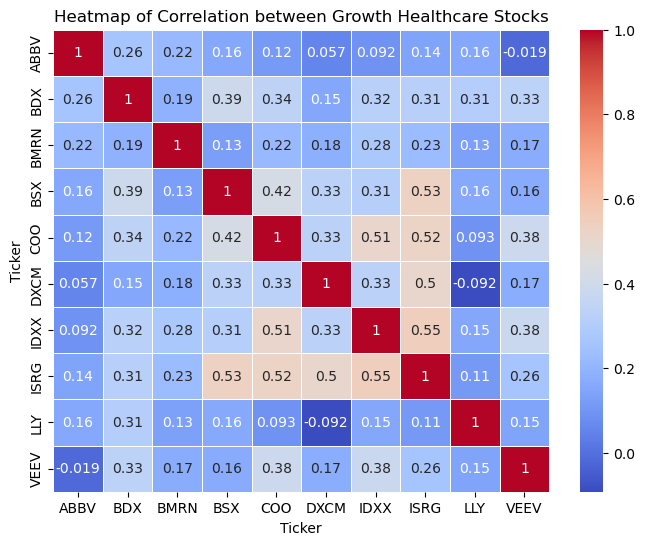

In [33]:
growth_healthcare_corr = healthcare_growth_daily_return.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(growth_healthcare_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation between Growth Healthcare Stocks')
plt.show()

Text(0, 0.5, 'Total Returns')

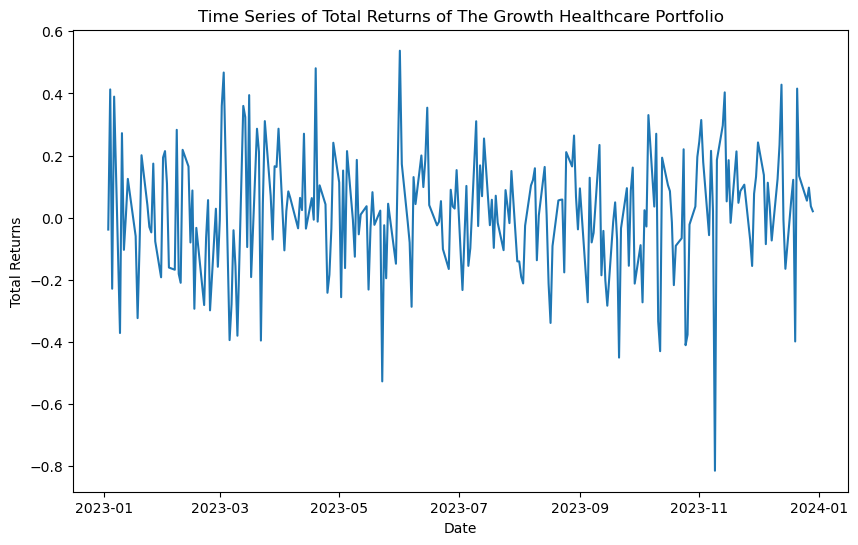

In [36]:
healthcare_growth_daily_return['Total Return'] = healthcare_growth_daily_return.sum(axis=1)
plt.figure(figsize=(10, 6))  # Set the figure size for better readability

# Plot each time series
plt.plot(healthcare_growth_daily_return['Total Return'])
plt.title('Time Series of Total Returns of The Growth Healthcare Portfolio')
plt.xlabel('Date')
plt.ylabel('Total Returns')

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

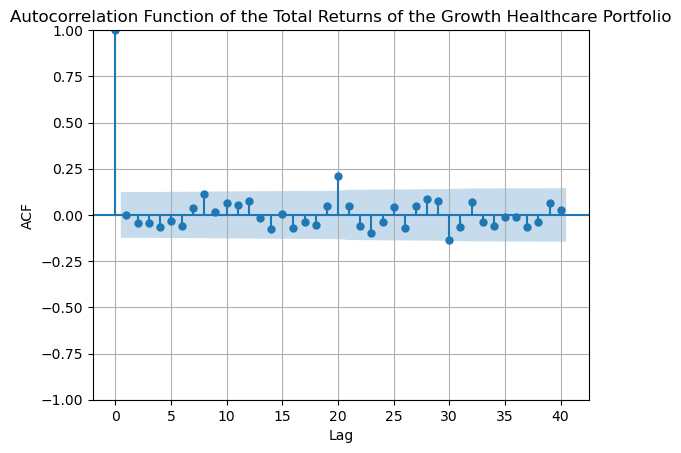

In [37]:
plt.figure(figsize=(10, 6))
plot_acf(healthcare_growth_daily_return.iloc[:,-1], lags=40) 
plt.title('Autocorrelation Function of the Total Returns of the Growth Healthcare Portfolio')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

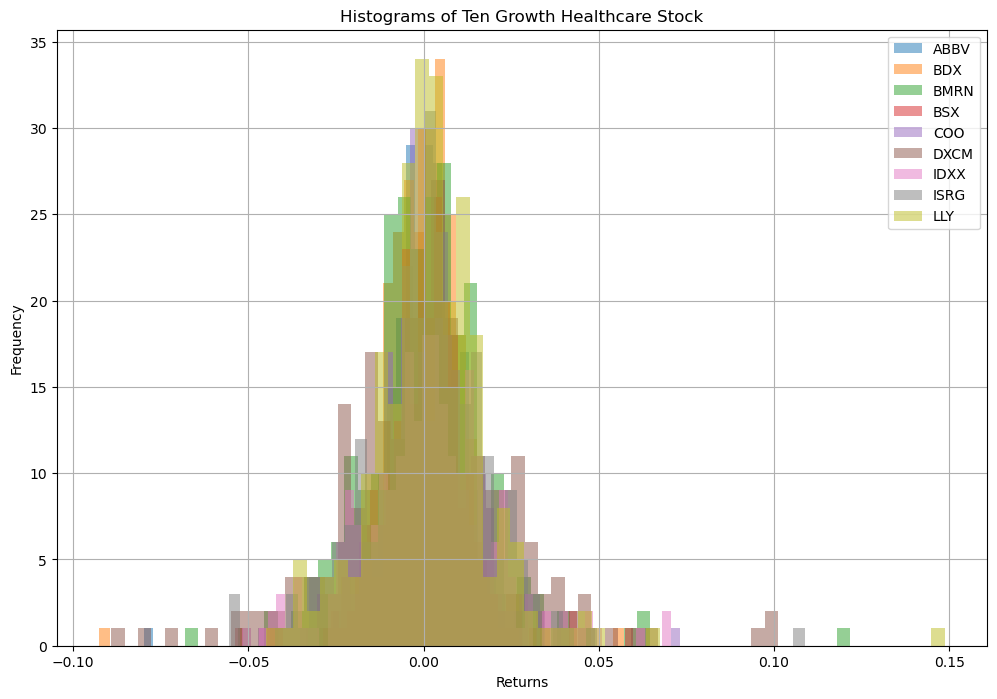

In [38]:
healthcare_growth_daily_return = healthcare_growth_daily_return.iloc[:,0:9]
plt.figure(figsize=(12, 8))
for col in healthcare_growth_daily_return.columns:
    plt.hist(healthcare_growth_daily_return[col], bins=50, alpha=0.5, label=col)

plt.title('Histograms of Ten Growth Healthcare Stock')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
value_stock_health = ['HUM', 'ROIV', 'HRMY', 'INMD','CVS','PDCO','MOH','AMN','ALKS','AMGN']
start_date = '2022-12-30'
healthcare_value_data = yf.download(value_stock_health, start=start_date)['Adj Close']
healthcare_value_daily_return = healthcare_value_data.pct_change().loc['2022-12-30': '2023-12-29',:]
benchmark = yf.download('^OEX', start=start_date)['Adj Close']

healthcare_value_daily_return = healthcare_value_daily_return.iloc[1:healthcare_growth_daily_return.shape[0],:]
healthcare_value_daily_return.index.name = None
healthcare_value_daily_return

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


Ticker,ALKS,AMGN,AMN,CVS,HRMY,HUM,INMD,MOH,PDCO,ROIV
2023-01-03,-0.009950,-0.003769,0.030928,-0.003005,-0.038838,-0.022843,-0.012325,-0.034220,-0.005708,-0.105131
2023-01-04,-0.020874,0.010472,-0.019151,-0.010010,0.015483,-0.016724,0.028361,-0.016901,0.017223,0.057343
2023-01-05,-0.000790,0.009342,0.030682,-0.016634,0.002603,-0.008331,-0.014065,-0.047810,-0.019400,0.076720
2023-01-06,0.071118,0.031252,0.024356,0.012714,-0.004822,0.009262,0.069650,0.010585,0.018345,0.136364
2023-01-09,-0.035780,-0.018459,-0.004646,-0.001201,-0.161014,-0.021988,-0.066161,-0.017567,-0.001766,0.018378
...,...,...,...,...,...,...,...,...,...,...
2023-12-21,0.013613,0.015081,0.034522,0.017866,0.007803,0.004537,0.042641,0.018828,0.021583,0.058233
2023-12-22,0.013430,0.017291,0.022839,0.001781,-0.004645,-0.001630,-0.000880,0.000419,-0.004577,0.033207
2023-12-26,-0.001791,-0.000915,0.012301,0.003047,0.029247,-0.000816,0.012324,-0.001758,0.006013,0.053260
2023-12-27,0.006817,0.009264,-0.006736,-0.002279,-0.003325,-0.003114,-0.021739,-0.002572,0.003165,0.009590


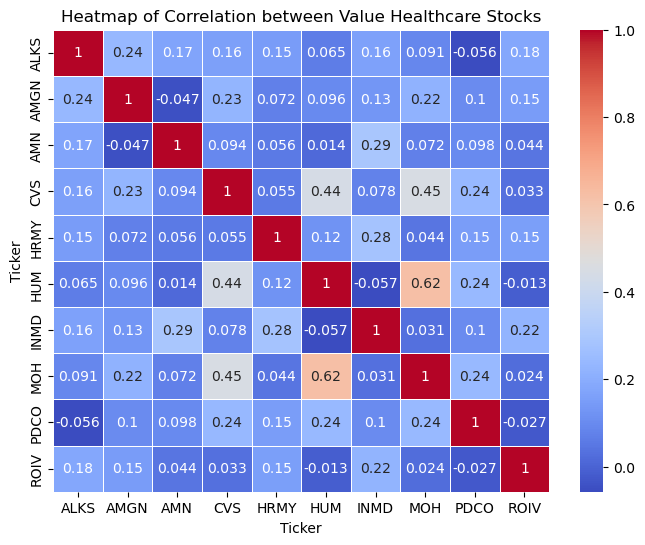

In [41]:
value_healthcare_corr = healthcare_value_daily_return.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(value_healthcare_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation between Value Healthcare Stocks')
plt.show()

Text(0, 0.5, 'Total Returns')

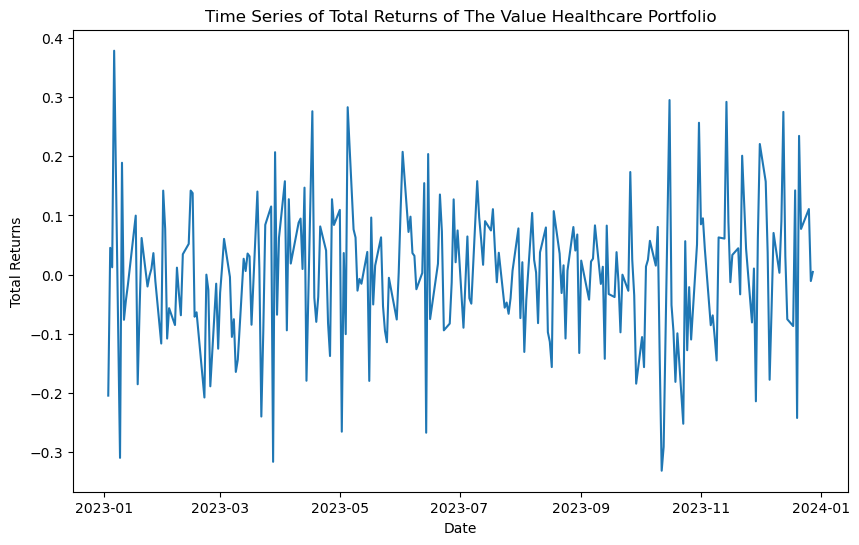

In [42]:
healthcare_value_daily_return['Total Return'] = healthcare_value_daily_return.sum(axis=1)
plt.figure(figsize=(10, 6))  # Set the figure size for better readability

# Plot each time series
plt.plot(healthcare_value_daily_return['Total Return'])
plt.title('Time Series of Total Returns of The Value Healthcare Portfolio')
plt.xlabel('Date')
plt.ylabel('Total Returns')

<Figure size 1000x600 with 0 Axes>

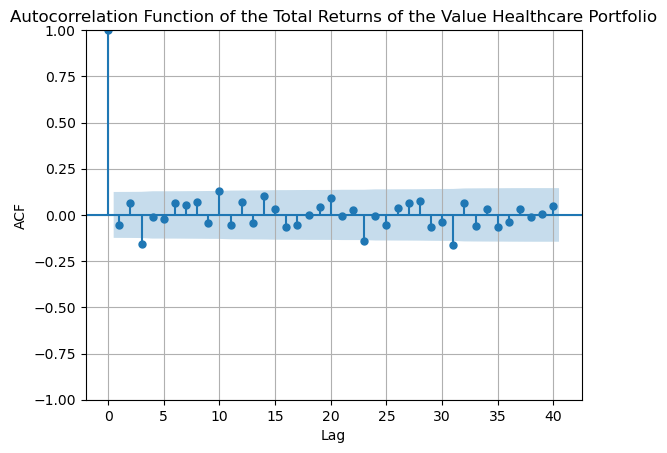

In [43]:
plt.figure(figsize=(10, 6))
plot_acf(healthcare_value_daily_return.iloc[:,-1], lags=40) 
plt.title('Autocorrelation Function of the Total Returns of the Value Healthcare Portfolio')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

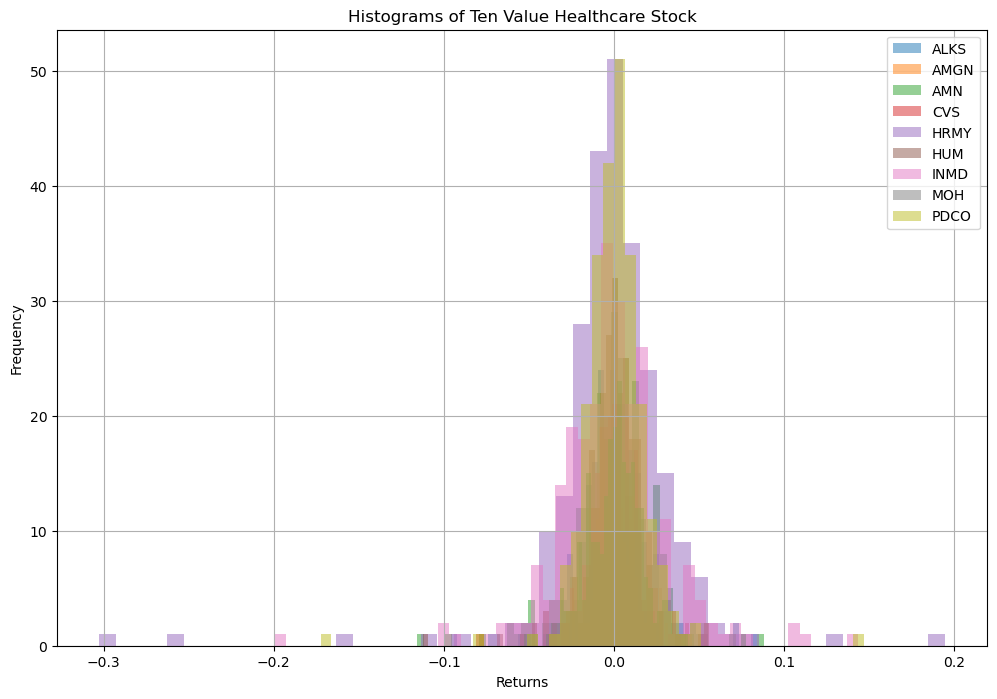

In [44]:
healthcare_value_daily_return = healthcare_value_daily_return.iloc[:,0:9]
plt.figure(figsize=(12, 8))
for col in healthcare_value_daily_return.columns:
    plt.hist(healthcare_value_daily_return[col], bins=50, alpha=0.5, label=col)

plt.title('Histograms of Ten Value Healthcare Stock')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()